# Exercises B: Solutions
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

### Exercise 1: NHL Hockey
The file `nhl1617.txt` contains data of all (non-goalie) players in the NHL who had at least some _ice time_, i.e. playing time, in the 2016/2017 regular season - without play-offs. Load the CSV data of the file `nhl1617.txt` in Python using `open` and further string transformations (_see below_). Try to cope with the huge string and allocate the information to a dictionary. Use the column names of the dataset as keys for the dictionary.

Solve these tasks using only a dictionary consisting of lists but **not using** _pandas_:

1. How many players have been recorded?
1. A column _points_ ("P") is missing in the data. The number of points of a player is defined as the sum of his _goals_ ("G") and _assists_ ("A"). Add the points to your dictionary.
1. Who is the top scorer in terms of points?
1. How many German (non-goalie) players had some ice time in there 2016/2017 regular season? _Hint: Nationality of a player can be found in the dictionary entry "Nat". Germans are indicated by "DEU"._
1. What are their names? *Hint: Names can be found in th entry "Last_Name" and "First_Name".*
1. Who performed best among the German players in terms of points ("P")?
1. How many points ("P") did he have?
1. How well did he perform in the entire league? Put differently, what was his rank in terms of points?
1. Find the top ten scorers (in terms of points) and print them including their number of point and their respective team.
1. What are the three countries with the most players originating from?

If you feel comfortable looping through dictionaries and lists, re-implement your codes **using** _pandas_.

In [37]:
with open("data/nhl1617.txt") as f:
    data = f.read()
data = data.replace('"', '')
data = data.splitlines()
var_names = data[0]
var_names = var_names.rsplit(";")
data.pop(0)
NHL = {}
for keys in var_names:
    NHL[keys] = []
for line in data:
    line = line.rsplit(';')
    for info, keys in zip(line, NHL):
        NHL[keys].append(info)
NHL["Last_Name"][:10]

['Abbott',
 'Abdelkader',
 'Aberg',
 'Acciari',
 'Agostino',
 'Aho',
 'Alzner',
 'Anderson',
 'Andersson',
 'Andreoff']

In [38]:
# Total number of players
n = len(NHL["Last_Name"])
n

888

In [39]:
# Creating the points column
NHL["P"] = []
for G, A in zip(NHL["G"], NHL["A"]):
    NHL["P"].append(int(G) + int(A))
NHL["P"][:10]

[0, 21, 2, 5, 3, 49, 13, 29, 0, 2]

In [40]:
# Finding the top scorer(s)
max_p = max(NHL["P"])
index = [i for i in range(n) if NHL["P"][i] == max_p]
if len(index) == 1:
    s = " is"
else:
    s = "s are"
print(f"The top scorer{s}:")
for i in index:
    print(f"{NHL['Last_Name'][i]}, {NHL['First_Name'][i]}")

The top scorer is:
McDavid, Connor


In [41]:
# Finding the German (non-goalie) players of the regular season
index = [i for i in range(n) if NHL["Nat"][i] == "DEU"]

# Alternative
# count = 0
# for nation in NHL["Nat"]:
#     if nation == "DEU":
#         count = count + 1

print(f"In the 2016/17 regular season there were {len(index)}"
      f" German (non-goalie) players:")
for i in index:
    print(f"{NHL['Last_Name'][i]}, {NHL['First_Name'][i]}")

In the 2016/17 regular season there were 5 German (non-goalie) players:
Draisaitl, Leon
Holzer, Korbinian
Kuhnhackl, Tom
Rieder, Tobias
Seidenberg, Dennis


In [42]:
# Finding the German top scorer(s)
ger_p = [NHL["P"][i] for i in index]
max_p = max(ger_p)
index_p = [index[i] for i, p in enumerate(ger_p) if p == max_p]
for i in index_p:
    print(f"{NHL['Last_Name'][i]} (Points: {max_p}) was"
          f" the best performing German NHL player.")

Draisaitl (Points: 77) was the best performing German NHL player.


In [43]:
# Assessing relative performance
count = 1
for i in NHL["P"]:
    if i > max_p:
        count += 1
print(f"{NHL['Last_Name'][index_p[0]]} was the {count}th"
      f" best performer in the entire League with respect to points.")

Draisaitl was the 8th best performer in the entire League with respect to points.


In [44]:
# Top 10 scorers
index = [i for i, j in sorted(enumerate(NHL["P"]),
                              reverse=True,
                              key=lambda x: x[1])]
for i in range(0, 10):
    print(f"{i + 1:2}. {NHL['Last_Name'][index[i]]:15}"
          f"  Team: {NHL['Team'][index[i]]:10}"
          f"  Points: {NHL['P'][index[i]]:3}")

 1. McDavid          Team: EDM         Points: 100
 2. Crosby           Team: PIT         Points:  89
 3. Kane             Team: CHI         Points:  89
 4. Backstrom        Team: WSH         Points:  86
 5. Kucherov         Team: T.B         Points:  85
 6. Marchand         Team: BOS         Points:  85
 7. Scheifele        Team: WPG         Points:  82
 8. Draisaitl        Team: EDM         Points:  77
 9. Burns            Team: S.J         Points:  76
10. Tarasenko        Team: STL         Points:  75


In [45]:
# The three countries with the most players originating from.
counts = {}
for nation in NHL["Nat"]:
    if nation in counts:
        counts[nation] += 1
    else:
        counts[nation] = 1
top3 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[0:3]
for nation, count in top3:
    print(f"{nation}: {count}")

CAN: 413
USA: 243
SWE: 79


#### Solution using pandas:

In [46]:
import pandas as pd
nhl = pd.read_csv("data/nhl1617.txt", sep=";")
nhl.count()

Born          888
City          888
Cntry         888
Nat           888
Ht            888
Wt            888
Last_Name     888
First_Name    888
Position      888
Team          888
GP            888
G             888
A             888
TOI           888
TOI_GP        888
dtype: int64

In [47]:
nhl["P"] = nhl["G"] + nhl["A"]
nhl.head()

,Born,City,Cntry,Nat,Ht,Wt,Last_Name,First_Name,Position,Team,GP,G,A,TOI,TOI_GP,P
0,30.04.1988,Hamilton,CAN,CAN,69,170,Abbott,Spencer,LW,CHI,1,0,0,514,8.57,0
1,25.02.1987,Muskegon,USA,USA,74,218,Abdelkader,Justin,LW/RW,DET,64,7,14,63969,16.65,21
2,23.09.1993,Stockholm,SWE,SWE,71,196,Aberg,Pontus,LW,NSH,15,1,1,11102,12.33,2
3,01.12.1991,Johnston,USA,USA,70,208,Acciari,Noel,C,BOS,29,2,3,18047,10.23,5
4,30.04.1992,Morristown,USA,USA,72,202,Agostino,Kenny,LW,STL,7,1,2,5366,12.78,3


In [48]:
max_index = nhl["P"].idxmax()
nhl.iloc[max_index]

Born             13.01.1997
City          Richmond Hill
Cntry                   CAN
Nat                     CAN
Ht                       73
Wt                      200
Last_Name           McDavid
First_Name           Connor
Position                  C
Team                    EDM
GP                       82
G                        30
A                        70
TOI                  103967
TOI_GP                21.13
P                       100
Name: 509, dtype: object

In [49]:
germans = nhl[nhl["Cntry"] == "DEU"]
print(germans.count())
germans

Born          6
City          6
Cntry         6
Nat           6
Ht            6
Wt            6
Last_Name     6
First_Name    6
Position      6
Team          6
GP            6
G             6
A             6
TOI           6
TOI_GP        6
P             6
dtype: int64


,Born,City,Cntry,Nat,Ht,Wt,Last_Name,First_Name,Position,Team,GP,G,A,TOI,TOI_GP,P
184,27.10.1995,Cologne,DEU,DEU,73,216,Draisaitl,Leon,C,EDM,82,29,48,92909,18.88,77
345,16.02.1988,Munich,DEU,DEU,75,215,Holzer,Korbinian,D,ANA,32,2,5,25945,13.52,7
427,21.01.1992,Landshut,DEU,DEU,74,196,Kuhnhackl,Tom,RW,PIT,57,4,12,36425,10.65,16
586,30.01.1994,Berlin,DEU,USA,69,180,O'Regan,Daniel,C/LW,S.J,3,1,0,2079,9.32,1
676,10.01.1993,Landshut,DEU,DEU,71,185,Rieder,Tobias,RW/C,ARI,80,16,18,83103,17.32,34
722,18.07.1981,Schwenningen,DEU,DEU,72,198,Seidenberg,Dennis,D,NYI,73,5,17,85089,19.43,22


In [50]:
max_index = germans["P"].idxmax()
nhl.iloc[max_index]

Born          27.10.1995
City             Cologne
Cntry                DEU
Nat                  DEU
Ht                    73
Wt                   216
Last_Name      Draisaitl
First_Name          Leon
Position               C
Team                 EDM
GP                    82
G                     29
A                     48
TOI                92909
TOI_GP             18.88
P                     77
Name: 184, dtype: object

In [51]:
nhl = nhl.sort_values('P', ascending=False).reset_index()
nhl[nhl["Last_Name"] == "Draisaitl"]


,index,Born,City,Cntry,Nat,Ht,Wt,Last_Name,First_Name,Position,Team,GP,G,A,TOI,TOI_GP,P
7,184,27.10.1995,Cologne,DEU,DEU,73,216,Draisaitl,Leon,C,EDM,82,29,48,92909,18.88,77


In [52]:
nhl.iloc[0:10]

,index,Born,City,Cntry,Nat,Ht,Wt,Last_Name,First_Name,Position,Team,GP,G,A,TOI,TOI_GP,P
0,509,13.01.1997,Richmond Hill,CAN,CAN,73,200,McDavid,Connor,C,EDM,82,30,70,103967,21.13,100
1,149,07.08.1987,Cole Harbour,CAN,CAN,71,200,Crosby,Sidney,C,PIT,75,44,45,89450,19.88,89
2,389,19.11.1988,Buffalo,USA,USA,71,177,Kane,Patrick,RW/C,CHI,82,34,55,105263,21.40,89
3,21,23.11.1987,Gävle,SWE,SWE,73,213,Backstrom,Nicklas,C,WSH,82,23,63,89839,18.27,86
4,426,17.06.1993,Maykop,RUS,RUS,71,178,Kucherov,Nikita,RW,T.B,74,40,45,86320,19.43,85
5,485,11.05.1988,Halifax,CAN,CAN,69,181,Marchand,Brad,LW/C,BOS,80,39,46,93295,19.35,85
6,704,15.03.1993,Kitchener,CAN,CAN,75,207,Scheifele,Mark,C,WPG,79,32,50,97447,20.57,82
7,184,27.10.1995,Cologne,DEU,DEU,73,216,Draisaitl,Leon,C,EDM,82,29,48,92909,18.88,77
8,91,09.03.1985,Barrie,CAN,CAN,77,230,Burns,Brent,D/RW,S.J,82,29,47,122324,24.93,76
9,802,13.12.1991,Yaroslavl,RUS,RUS,72,219,Tarasenko,Vladimir,RW,STL,82,39,36,90872,18.47,75


In [53]:
country = nhl[["Cntry", "Last_Name"]].groupby(["Cntry"]).count()\
          .sort_values("Last_Name", ascending=False)
country[:3]

,Last_Name
Cntry,
CAN,415
USA,242
SWE,77


### Exercise 2: Same sex marriage - "Ehe für Alle"
The file `data/votings.txt` contains the voting behavior of all members of the german parliament regarding a draft that aimed to legalise same sex marriage. Party membership is also part of the dataset.

The following list contains the ministers: ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian', 'Dobrindt', 'Maizière, Dr.', 'Schäuble']

Note that _Wanka_ was not part of the German parliament. _Gröhe_ and _Müller_ did not participate in the poll.

1. We are interested in the share of voting in favor of same sex marriage grouped by party membership.
1. Display the votings of the members of the CDU/CSU who were also part of the top-level administration.

In [54]:
names = ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian',
         'Dobrindt', 'Maizière, Dr.', 'Schäuble']

In [55]:
# one solution using pandas
import pandas as pd

df = pd.read_csv("data/votings.txt", sep=";")
df.head()

,Assemblyman,Party,Vote
0,"Albani, Stephan",CDU/CSU,Ja
1,"Albsteiger, Katrin",CDU/CSU,Nein
2,"Altmaier, Peter",CDU/CSU,Ja
3,"Auernhammer, Artur",CDU/CSU,Nein
4,"Bär, Dorothee",CDU/CSU,Nein


In [56]:
res = df.groupby(["Party", "Vote"]).count()
res.columns = ["abs"]
res

abs
Party        Vote           
B90/Grüne    Ja           63
CDU/CSU      Enthalten     4
             Ja           75
             Nein        225
             Nicht abg.    5
Die Linke    Ja           63
             Nicht abg.    1
SPD          Ja          192
             Nicht abg.    1
fraktionslos Nein          1

In [57]:
res["rel"] = res / res.groupby(level=0).sum()
res

abs       rel
Party        Vote                     
B90/Grüne    Ja           63  1.000000
CDU/CSU      Enthalten     4  0.012945
             Ja           75  0.242718
             Nein        225  0.728155
             Nicht abg.    5  0.016181
Die Linke    Ja           63  0.984375
             Nicht abg.    1  0.015625
SPD          Ja          192  0.994819
             Nicht abg.    1  0.005181
fraktionslos Nein          1  1.000000

In [58]:
# without counting the non-votes
res = df[df.Vote != "Nicht abg."].groupby(["Party", "Vote"]).count()
res.columns = ["abs"]
res["rel"] = res / res.groupby(level=0).sum()
res

abs       rel
Party        Vote                    
B90/Grüne    Ja          63  1.000000
CDU/CSU      Enthalten    4  0.013158
             Ja          75  0.246711
             Nein       225  0.740132
Die Linke    Ja          63  1.000000
SPD          Ja         192  1.000000
fraktionslos Nein         1  1.000000

In [59]:
# yet another solution without using pandas
with open("data/votings.txt") as f:
    data = f.read()
data = data.replace('"', '')
data = data.splitlines()
var_names = data[0]
var_names = var_names.rsplit(';')
data.pop(0)
vote = {}
for keys in var_names:
    vote[keys] = []
for line in data:
    line = line.rsplit(';')
    for info, keys in zip(line, vote):
        vote[keys].append(info)
parties = {}
for party in list(set(vote["Party"])):
    parties[party] = []
for party in parties:
    num_assembly = [1 for i, j in zip(vote["Vote"], vote["Party"])
                    if i != "Nicht abg." and j == party]
    num_assembly = sum(num_assembly)
    share = [1 for i, j in zip(vote["Vote"], vote["Party"])
             if i == "Ja" and j == party]
    share = sum(share) / num_assembly
    parties[party] = share
print(parties)

{'Die Linke': 1.0, 'B90/GrÃ¼ne': 1.0, 'SPD': 1.0, 'CDU/CSU': 0.24671052631578946, 'fraktionslos': 0.0}


In [60]:
# one solution using pandas
df[df.Assemblyman.str.contains("|".join(names))]

,Assemblyman,Party,Vote
2,"Altmaier, Peter",CDU/CSU,Ja
33,"Dobrindt, Alexander",CDU/CSU,Nein
52,"Friedrich, Dr. Hans-Peter",CDU/CSU,Nein
155,"Leyen, Dr. Ursula von der",CDU/CSU,Ja
168,"Maizière, Dr. Thomas de",CDU/CSU,Nein
176,"Merkel, Dr. Angela",CDU/CSU,Nein
223,"Schäuble, Dr. Wolfgang",CDU/CSU,Nein
229,"Schmidt, Christian",CDU/CSU,Nein


In [61]:
# yet another solution without using pandas
index = []

for i in range(0, len(vote['Assemblyman'])):
    for j in names:
        if j in vote['Assemblyman'][i]:
            index.append(i)

for i in index:
    assemblyman = vote['Assemblyman'][i]
    name = assemblyman[assemblyman.find(',')+1:].replace(' ', '')
    name = name + ' ' + assemblyman[0:assemblyman.find(',')]
    print(name, 'voted "%s".' % vote['Vote'][i])

Peter Altmaier voted "Ja".
Alexander Dobrindt voted "Nein".
Dr.Hans-Peter Friedrich voted "Nein".
Dr.Ursulavonder Leyen voted "Ja".
Dr.Angela Merkel voted "Nein".
Christian Schmidt voted "Nein".


### Exercise 3: Stock market data
1. Read the file `amzn.csv` into a DataFrame.
1. Read the file `dji.csv` into a new DataFrame.
1. Remove all columns in both DataFrames except _Adj Close_ and _Volume_.
1. Rename columns to _Amzn Adj Close_, _Amzn Volume_, _Dji Adj Close_, _Dji Volume_.

In [62]:
import pandas as pd
amzn = pd.read_csv("data/amzn.csv", index_col=0, parse_dates=True)
dow = pd.read_csv("data/dji.csv", index_col=0, parse_dates=True)
amzn = amzn.drop(["Open", "Close", "High", "Low"], axis=1)
dow = dow.drop(["Open", "Close", "High", "Low"], axis=1)
amzn = amzn.rename(columns={"Adj Close": "Amzn Adj Close",
                            "Volume": "Amzn Volume"})
dow = dow.rename(columns={"Adj Close": "Dji Adj Close",
                          "Volume": "Dji Volume"})
amzn.head()

,Amzn Adj Close,Amzn Volume
Date,,
2017-02-23,852.190002,3462000
2017-02-24,845.239990,3688000
2017-02-27,848.640015,2713600
2017-02-28,845.039978,2793700
2017-03-01,853.080017,2760100


In [63]:
dow.head()

,Dji Adj Close,Dji Volume
Date,,
2005-01-28,10427.200195,358720000
2005-01-31,10489.940430,298060000
2005-02-01,10551.940430,283800000
2005-02-02,10596.790039,279860000
2005-02-03,10593.099609,229000000


### Exercise 4: Performances
1. Concatenate both DataFrames along the _Date_ (rows) axis.
1. Remove all rows which contain no data for Amazon.
1. Let _Adj Close_ (2017-02-23) be the reference price (the base). Add two columns which give the _Adj Close_ as a percentage of the reference price.
1. Add a column that contains the 10-days-rolling-correlation between the _Adj Close_ of Amazon and the Dji.
1. Calculate the mean of the correlation columns.

In [64]:
all_data = pd.concat([amzn, dow], axis=1)
all_data = all_data.dropna(axis=0, how="any")
all_data["Amzn percentage"] = all_data["Amzn Adj Close"] /\
                              all_data["Amzn Adj Close"][0] * 100
all_data["Dji percentage"] = all_data["Dji Adj Close"] /\
                             all_data["Dji Adj Close"][0] * 100
all_data["Corr"] = all_data["Amzn Adj Close"].rolling(window=10).\
                                              corr(all_data["Dji Adj Close"])
print(all_data["Corr"].mean())

0.36462402244879927


### Exercise 5: Simple trading algorithm
Consider the Amazon DataFrame.

1. Add two columns containing the upper and lower Bollinger Band (10-days-rolling-mean +/- standard deviation of the 10-days-rolling-mean).
1. Add a column which says `BUY` if the _Adj Close_ breaks through the lower band (coming from below the lower band) and says `SELL` if the _Adj Close_ falls below the upper band (coming from above the upper band).
1. Write a function that you provide with an initial investment and that computes the total return of investment based on the signals `BUY` and `SELL`.
    1. Specify the amount of money to invest at the beginning.
    1. At every `BUY` signal, you spend the total amount of your money to buy Amazon stocks.
    1. At every `SELL` signal, you sell all stocks again.
    1. At the end of the full period, compute the total return.

In [70]:
amzn["Rolling"] = amzn["Amzn Adj Close"].rolling(window=10).mean()
amzn["Std"] = amzn["Amzn Adj Close"].rolling(window=10).std()
amzn["Upper"] = amzn["Rolling"] + amzn["Std"]
amzn["Lower"] = amzn["Rolling"] - amzn["Std"]
amzn["Trade"] = ""

amzn

<Axes: xlabel='Date'>

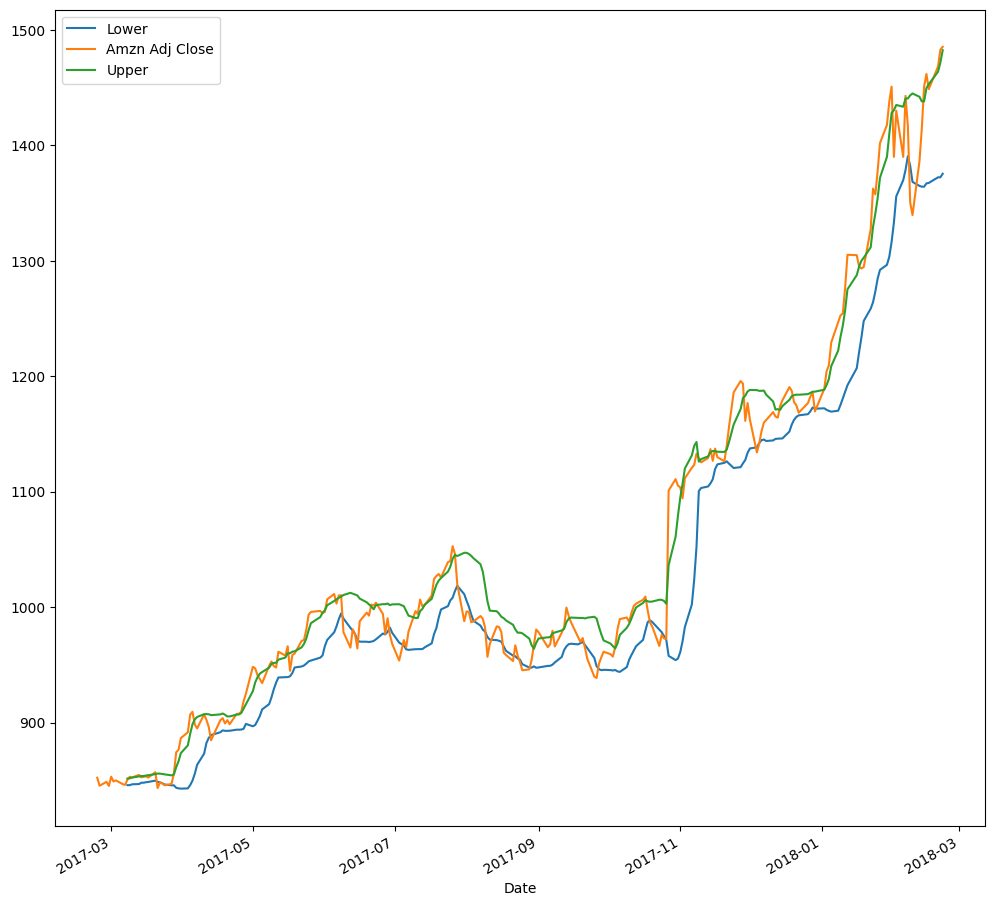

In [69]:
%matplotlib inline
amzn[["Lower", "Amzn Adj Close", "Upper"]].plot(figsize=(12, 12))

In [66]:
for i in range(1, len(amzn.index)):
    if amzn["Amzn Adj Close"][i] > amzn["Lower"][i] and\
       amzn["Amzn Adj Close"][i-1] < amzn["Lower"][i-1]:
        amzn.at[amzn.index[i], 'Trade'] = 'BUY'

    if amzn["Amzn Adj Close"][i] < amzn["Upper"][i] and\
       amzn["Amzn Adj Close"][i-1] > amzn["Upper"][i-1]:
        amzn.at[amzn.index[i], 'Trade'] = 'SELL'

amzn.head(20)

,Amzn Adj Close,Amzn Volume,Rolling,Std,Upper,Lower,Trade
Date,,,,,,,
2017-02-23,852.190002,3462000,NaN,NaN,NaN,NaN,
2017-02-24,845.239990,3688000,NaN,NaN,NaN,NaN,
2017-02-27,848.640015,2713600,NaN,NaN,NaN,NaN,
2017-02-28,845.039978,2793700,NaN,NaN,NaN,NaN,
2017-03-01,853.080017,2760100,NaN,NaN,NaN,NaN,
2017-03-02,848.909973,2132100,NaN,NaN,NaN,NaN,
2017-03-03,849.880005,1941100,NaN,NaN,NaN,NaN,
2017-03-06,846.609985,2610400,NaN,NaN,NaN,NaN,
2017-03-07,846.020020,2247600,NaN,NaN,NaN,NaN,


In [67]:
amzn.tail(20)

,Amzn Adj Close,Amzn Volume,Rolling,Std,Upper,Lower,Trade
Date,,,,,,,
2018-01-25,1377.949951,4753000,1319.494995,34.854654,1354.349649,1284.640341,
2018-01-26,1402.050049,4857300,1332.031995,39.922253,1371.954248,1292.109742,
2018-01-29,1417.680054,5701900,1343.280005,46.779068,1390.059073,1296.500937,
2018-01-30,1437.819946,5871900,1356.576001,53.112457,1409.688458,1303.463544,
2018-01-31,1450.890015,6424700,1372.165002,55.838813,1428.003816,1316.326189,
2018-02-01,1390.000000,9113800,1381.833008,48.566791,1430.399799,1333.266217,SELL
2018-02-02,1429.949951,11125700,1395.370007,39.578670,1434.948678,1355.791337,
2018-02-05,1390.000000,11495000,1401.639002,31.801324,1433.440325,1369.837678,
2018-02-06,1442.839966,11066800,1409.668994,30.958576,1440.627570,1378.710419,


In [68]:
def algo(amzn, invest, lag=1):
    last_order = "SELL"
    stocks = 0
    cash = invest
    for i in range(lag, len(amzn.index)):
        if amzn["Trade"][i-lag] == "BUY" and last_order == "SELL":
            stocks = cash / amzn["Amzn Adj Close"][i]
            cash = 0
            last_order = "BUY"
            print(f"Buy {stocks:5.2f} stocks on {amzn.index[i].date()}"
                  f" at a price of {amzn['Amzn Adj Close'][i]:7.2f}")
        if amzn["Trade"][i-lag] == "SELL" and last_order == "BUY":
            print(f"Sell {stocks:4.2f} stocks on {amzn.index[i].date()}"
                  f" at a price of {amzn['Amzn Adj Close'][i]:7.2f}")
            cash = amzn["Amzn Adj Close"][i] * stocks
            stocks = 0
            last_order = "SELL"
    if stocks > 0:
        cash = amzn["Amzn Adj Close"][-1] * stocks
    return (cash - invest) / invest * 100


# let's invest 1000 USD
invest = 1000
total_return = algo(amzn, invest)
print(f"Your total return of investment is {total_return:.2f} %,"
      f" i.e. {total_return * invest / 100:.2f} USD!")

Buy  1.18 stocks on 2017-03-24 at a price of  845.61
Sell 1.18 stocks on 2017-04-07 at a price of  894.88
Buy  1.17 stocks on 2017-04-18 at a price of  903.78
Sell 1.17 stocks on 2017-05-05 at a price of  934.15
Buy  1.12 stocks on 2017-06-14 at a price of  976.47
Sell 1.12 stocks on 2017-06-27 at a price of  976.78
Buy  1.13 stocks on 2017-07-06 at a price of  965.14
Sell 1.13 stocks on 2017-07-17 at a price of 1010.04
Buy  1.16 stocks on 2017-08-08 at a price of  989.84
Sell 1.16 stocks on 2017-09-06 at a price of  967.80
Buy  1.17 stocks on 2017-09-28 at a price of  956.40
Sell 1.17 stocks on 2017-10-19 at a price of  986.61
Buy  1.05 stocks on 2017-10-27 at a price of 1100.95
Sell 1.05 stocks on 2017-11-03 at a price of 1111.60
Buy  1.01 stocks on 2017-12-07 at a price of 1159.79
Sell 1.01 stocks on 2017-12-21 at a price of 1174.76
Buy  0.98 stocks on 2018-01-03 at a price of 1204.20
Sell 0.98 stocks on 2018-01-19 at a price of 1294.58
Buy  0.90 stocks on 2018-02-13 at a price of 1